In [1]:
classes = {
    0: "0",
    1: "1",
}
classes

{0: '0', 1: '1'}

In [2]:
import torch


zero = torch.Tensor(
    [
        [0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0],
    ]
)
zero

tensor([[0., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0.]])

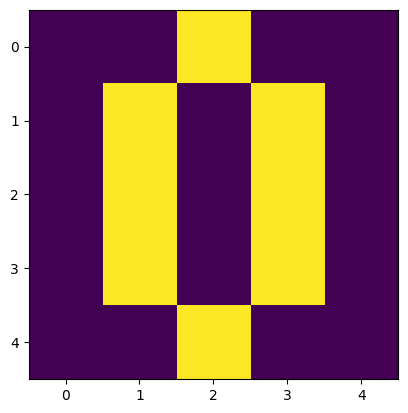

In [3]:
import matplotlib.pyplot as plt

plt.imshow(zero)
plt.show()

In [4]:
import torch


one = torch.Tensor(
    [
        [0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0],
    ]
)
one

tensor([[0., 0., 1., 0., 0.],
        [0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 1., 1., 0.]])

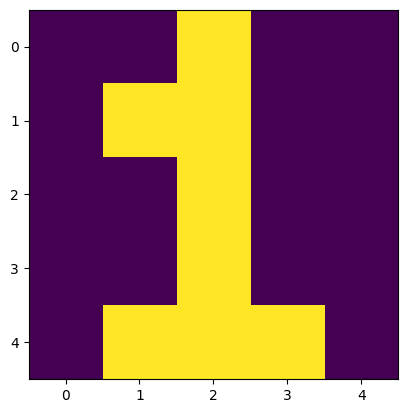

In [5]:
import matplotlib.pyplot as plt

plt.imshow(one)
plt.show()

In [6]:
zero_one = torch.Tensor(
    [
        [
            [0, 0, 1, 0, 0],
            [0, 1, 0, 1, 0],
            [0, 1, 0, 1, 0],
            [0, 1, 0, 1, 0],
            [0, 0, 1, 0, 0],
        ],
        [
            [0, 0, 1, 0, 0],
            [0, 1, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 1, 1, 1, 0],
        ],
    ]
)
zero_one

tensor([[[0., 0., 1., 0., 0.],
         [0., 1., 0., 1., 0.],
         [0., 1., 0., 1., 0.],
         [0., 1., 0., 1., 0.],
         [0., 0., 1., 0., 0.]],

        [[0., 0., 1., 0., 0.],
         [0., 1., 1., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 1., 1., 1., 0.]]])

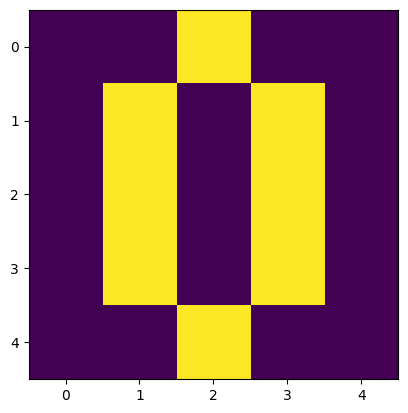

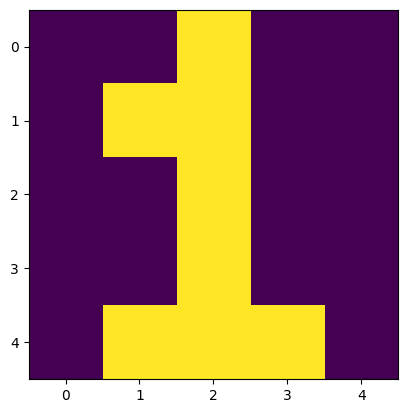

In [8]:
plt.imshow(zero_one[0])
plt.show()
plt.imshow(zero_one[1])
plt.show()

In [10]:
y = torch.tensor([0, 1])
y

tensor([0, 1])

In [13]:
print(classes[y[0].item()])
print(classes[y[1].item()])

0
1


In [68]:
import torch.nn as nn
import torch.nn.functional as F


class Dense(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(25, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [69]:
net = Dense()
net

Dense(
  (fc1): Linear(in_features=25, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=2, bias=True)
)

In [70]:
net(zero_one.view(-1, 25))

tensor([[-0.0132,  0.0562],
        [ 0.0060,  0.0575]], grad_fn=<AddmmBackward0>)

In [71]:
net(zero_one.view(-1, 25)).shape

torch.Size([2, 2])

In [104]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.001)
epochs = 100

In [105]:
from tqdm import tqdm

losses = []

for epoch in tqdm(range(epochs)):
    optimizer.zero_grad()
    outputs = net.forward(zero_one.view(-1, 25))
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss)

100%|██████████| 100/100 [00:00<00:00, 1121.79it/s]


In [106]:
type(losses)

list

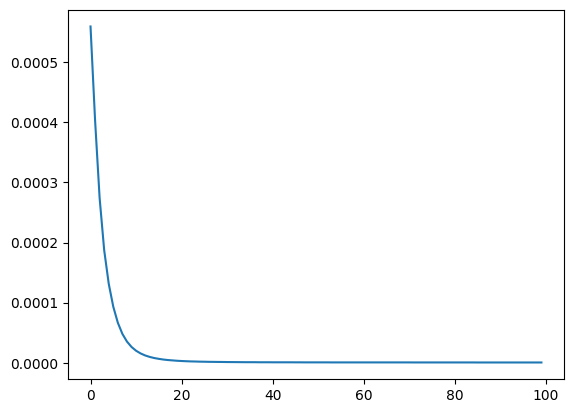

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt

losses = torch.tensor(losses)
plt.plot(losses)
plt.show()

In [108]:
zero_one[0]

tensor([[0., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0.]])

In [109]:
classes[net(zero_one[0].view(-1, 25)).max(dim=1)[1].item()]

'0'

In [110]:
classes[net(zero_one[1].view(-1, 25)).max(dim=1)[1].item()]

'1'

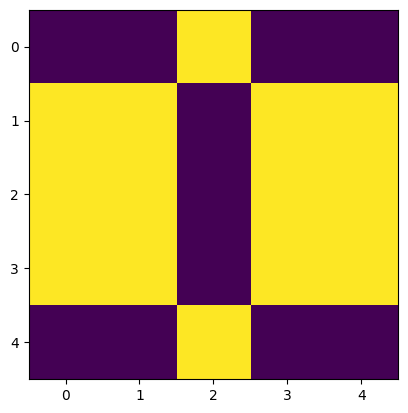

Predicted class: 1
tensor([[ 6.7161, -7.2775]], grad_fn=<AddmmBackward0>)
torch.return_types.max(
values=tensor([6.7161], grad_fn=<MaxBackward0>),
indices=tensor([0]))


'0'

In [117]:
near_zero = torch.Tensor(
    [
        [0, 0, 1, 0, 0],
        [1, 1, 0, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 0, 1, 1],
        [0, 0, 1, 0, 0],
    ],
)

# near_zero
plt.imshow(near_zero)
plt.show()


# 確信度の計算
probs = F.softmax(outputs, dim=1)

# 最も確信度の高いクラスを表示
predicted_class = classes[probs.argmax(dim=1)[1].item()]
print(f"Predicted class: {predicted_class}")

print(net(near_zero.view(-1, 25)))
print(net(near_zero.view(-1, 25)).max(dim=1))
classes[net(near_zero.view(-1, 25)).max(dim=1)[1].item()]

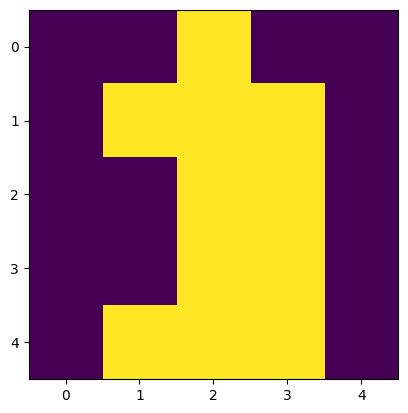

Predicted class: 1
tensor([[-2.0547,  1.8397]], grad_fn=<AddmmBackward0>)
torch.return_types.max(
values=tensor([1.8397], grad_fn=<MaxBackward0>),
indices=tensor([1]))


'1'

In [116]:
near_one = torch.Tensor(
    [
        [0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 1, 0],
        [0, 0, 1, 1, 0],
        [0, 1, 1, 1, 0],
    ],
)

# near_one
plt.imshow(near_one)
plt.show()

# 確信度の計算
probs = F.softmax(outputs, dim=1)


# 最も確信度の高いクラスを表示
predicted_class = classes[probs.argmax(dim=1)[1].item()]
print(f"Predicted class: {predicted_class}")

print(net(near_one.view(-1, 25)))
print(net(near_one.view(-1, 25)).max(dim=1))
classes[net(near_one.view(-1, 25)).max(dim=1)[1].item()]